#------------------------------- Dataframe Calculations --------------------------------


In [ ]:
print('hello world')

hello world


In [ ]:
# THIS IS THE MOST IMPORTANT NOTEBOOK IN THIS COURSE

import pandas as pd

In [ ]:
# reading a csv table into a variable
superstore = pd.read_csv("Sample - EU Superstore.csv")
# reading the excel table into a variable
orders = pd.read_excel("orders.xlsx")

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
display(superstore)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,ES-2017-1311038,07/02/2017,11/02/2017,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-ST-10000988,Office Supplies,Storage,"Fellowes Folders, Blue",79.20,3,0.0,39.60
1,2,ES-2017-1311038,07/02/2017,11/02/2017,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,TEC-AC-10004144,Technology,Accessories,"SanDisk Numeric Keypad, Bluetooth",388.92,7,0.0,0.00
2,3,ES-2017-1311038,07/02/2017,11/02/2017,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-LA-10001915,Office Supplies,Labels,"Avery Legal Exhibit Labels, 5000 Label Set",35.19,3,0.0,16.11
3,4,ES-2017-1311038,07/02/2017,11/02/2017,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-ST-10004550,Office Supplies,Storage,"Fellowes Folders, Wire Frame",50.94,2,0.0,13.20
4,5,ES-2017-1311038,07/02/2017,11/02/2017,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,TEC-AC-10004068,Technology,Accessories,"Memorex Memory Card, USB",307.44,3,0.0,73.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,ES-2014-3780358,16/11/2014,19/11/2014,First Class,CC-12100,Chad Cunningham,Home Office,Rovigo,Veneto,Italy,South,OFF-BI-10000346,Office Supplies,Binders,"Ibico 3-Hole Punch, Clear",59.82,2,0.0,23.88
9996,9997,ES-2015-5371207,25/01/2015,29/01/2015,Standard Class,GB-14575,Giulietta Baptist,Consumer,Hamburg,Hamburg,Germany,Central,OFF-BI-10002083,Office Supplies,Binders,"Acco Hole Reinforcements, Economy",6.66,1,0.0,0.57
9997,9998,ES-2015-5371207,25/01/2015,29/01/2015,Standard Class,GB-14575,Giulietta Baptist,Consumer,Hamburg,Hamburg,Germany,Central,OFF-SU-10003211,Office Supplies,Supplies,"Acme Ruler, Steel",96.66,6,0.0,28.98
9998,9999,ES-2015-5371207,25/01/2015,29/01/2015,Standard Class,GB-14575,Giulietta Baptist,Consumer,Hamburg,Hamburg,Germany,Central,TEC-PH-10001664,Technology,Phones,"Motorola Office Telephone, VoIP",502.95,7,0.0,221.13


# Slicing

In [ ]:
# shows the first 5 rows of the table
superstore.head()

NameError: ignored

In [ ]:
#shows the last 10 rows of the table
superstore.tail(10)

NameError: ignored

In [ ]:
# this returns an iterable columns object
superstore.columns
list(superstore.columns)

In [ ]:
# this returns an iterable index object
superstore.index
list(superstore.index)

list(orders.index) 

In [ ]:
# how can I slice one or more columns

# slicing one column
superstore["City"]

In [ ]:
#Slicing multiple columns

superstore[['City', 'Country','Region']]

# Basic exploration & computation

In [ ]:
#some useful column methods
# unique method of pandas 
superstore['Country'].nunique()
#superstore['Country'].unique()
#superstore['Country'].value_counts()


15

In [ ]:
# some useful column aggregations

# the sale with the highest value?
superstore['Sales'].max()

# what's the average sales value?
superstore[['Sales','Profit']].mean()

Sales     293.808906
Profit     37.282974
dtype: float64

In [ ]:
#on a Dataframe, a column aggregation function applies to all columns
superstore.max()

Row ID                                     10000
Order ID                         IT-2017-5992832
Order Date                            31/12/2017
Ship Date                             31/12/2017
Ship Mode                         Standard Class
Customer ID                             ZD-21925
Customer Name                 Zuschuss Donatelli
Segment                              Home Office
City                                      Zwolle
State                                     Zürich
Country                           United Kingdom
Region                                     South
Product ID                       TEC-PH-10004992
Category                              Technology
Sub-Category                              Tables
Product Name     Xerox Parchment Paper, Recycled
Sales                                    7958.58
Quantity                                      14
Discount                                    0.85
Profit                                   3979.08
dtype: object

In [ ]:
# but only on the columns where it makes sense
superstore.mean()

Row ID      5000.500000
Sales        293.808906
Quantity       3.777300
Discount       0.103105
Profit        37.282974
dtype: float64

In [ ]:
#We can do computations over columns
# Let's calculate the unitary price (anyone has an idea how can we do this) 
superstore['Sales']/superstore['Quantity']

#and store the result in a new column
superstore['Unitary price'] = superstore['Sales']/superstore['Quantity']
superstore[['Unitary price','Sales','Quantity']].head()

#we can also do comparisons
superstore['Large sale'] = superstore['Sales']>100 # create a boolean mask and save it into a new column
superstore[['Large sale','Sales']].head()


,Large sale,Sales
0,False,79.20
1,True,388.92
2,False,35.19
3,False,50.94
4,True,307.44


# Filtering & boolean masks

In [ ]:
#a column like the one above (only True/False) is called a Boolean Mask
#Boolean masks are very useful to filter rows in DataFrames
superstore['Sales']>100
superstore[superstore['Sales']>100].head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Unitary price,Large sale
1,2,ES-2017-1311038,07/02/2017,11/02/2017,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,TEC-AC-10004144,Technology,Accessories,"SanDisk Numeric Keypad, Bluetooth",388.92,7,0.0,0.00,55.56,True
4,5,ES-2017-1311038,07/02/2017,11/02/2017,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,TEC-AC-10004068,Technology,Accessories,"Memorex Memory Card, USB",307.44,3,0.0,73.71,102.48,True
5,6,ES-2017-1311038,07/02/2017,11/02/2017,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-ST-10002271,Office Supplies,Storage,"Rogers Shelving, Wire Frame",122.40,2,0.0,37.92,61.20,True
6,7,ES-2017-1311038,07/02/2017,11/02/2017,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,TEC-PH-10003963,Technology,Phones,"Apple Signal Booster, Full Size",413.82,3,0.0,20.61,137.94,True
7,8,ES-2015-5113958,02/08/2015,07/08/2015,Second Class,EB-13840,Ellis Ballard,Corporate,West Bromwich,England,United Kingdom,North,TEC-CO-10004325,Technology,Copiers,"Canon Personal Copier, Laser",428.22,3,0.0,192.69,142.74,True


In [ ]:
# do it yourself
# find the supersore line with the maximum sales

In [ ]:
#solution
superstore[superstore['Sales'] == superstore['Sales'].max()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Unitary price,Large sale,Large Sales,Large Quantity,Salesmean,Large Quantity and Sales,Large Quantity or Sales,not Large Quantity
1774,1775,ES-2017-1651774,08/09/2017,14/09/2017,Standard Class,PJ-18835,Patrick Jones,Corporate,Prato,Tuscany,Italy,South,OFF-AP-10004512,Office Supplies,Appliances,"Hoover Stove, Red",7958.58,14,0.0,3979.08,568.47,True,True,True,293.808906,True,True,False


In [ ]:
#Boolean masks can also be combined by boolean operators (and, or, not), which in pandas are denoted by (&,|,~)

superstore['Large Sales'] = superstore['Sales']>superstore['Sales'].mean()
superstore['Large Quantity'] =superstore['Quantity']>5
superstore['Salesmean'] = superstore['Sales'].mean()

superstore[['Sales','Quantity','Salesmean','Large Sales','Large Quantity']].head()

superstore['Large Quantity and Sales'] = (superstore['Quantity']>5) & (superstore['Sales']>superstore['Sales'].mean())
superstore['Large Quantity or Sales'] = (superstore['Quantity']>5) | (superstore['Sales']>superstore['Sales'].mean())
superstore['not Large Quantity'] = ~(superstore['Quantity']>5) # negation of a condition returns the symetric 

superstore[['Sales','Quantity','Salesmean','Large Sales','Large Quantity','Large Quantity and Sales','Large Quantity or Sales','not Large Quantity']].head()

,Sales,Quantity,Salesmean,Large Sales,Large Quantity,Large Quantity and Sales,Large Quantity or Sales,not Large Quantity
0,79.20,3,293.808906,False,False,False,False,True
1,388.92,7,293.808906,True,True,True,True,False
2,35.19,3,293.808906,False,False,False,False,True
3,50.94,2,293.808906,False,False,False,False,True
4,307.44,3,293.808906,True,False,False,True,True


In [ ]:
#This means these combinations can be used in filters as well
superstore[(superstore['City']=='Lisbon')].head()
#superstore[(superstore['City']=='Lisbon')&(superstore['Segment']=='Corporate')].head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Unitary price,Large sale,Large Sales,Large Quantity,Salesmean,Large Quantity and Sales,Large Quantity or Sales,not Large Quantity
163,164,IT-2016-3695467,10/06/2016,14/06/2016,Standard Class,SS-20140,Saphhira Shifley,Corporate,Lisbon,Lisboa,Portugal,South,OFF-AP-10001623,Office Supplies,Appliances,"Hoover Stove, White",3399.660,12,0.5,-3059.820,283.305,True,True,True,293.808906,True,True,False
345,346,IT-2017-5630655,27/08/2017,03/09/2017,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Lisbon,Lisboa,Portugal,South,OFF-PA-10001971,Office Supplies,Paper,"Eaton Memo Slips, Premium",34.350,5,0.5,-11.100,6.870,False,False,False,293.808906,False,False,True
872,873,IT-2017-2208571,26/12/2017,28/12/2017,First Class,MS-17365,Maribeth Schnelling,Consumer,Lisbon,Lisboa,Portugal,South,OFF-BI-10000171,Office Supplies,Binders,"Wilson Jones Index Tab, Recycled",20.430,6,0.5,-9.090,3.405,False,False,True,293.808906,False,True,False
873,874,IT-2017-2208571,26/12/2017,28/12/2017,First Class,MS-17365,Maribeth Schnelling,Consumer,Lisbon,Lisboa,Portugal,South,TEC-CO-10002232,Technology,Copiers,"HP Ink, Laser",321.750,5,0.5,-193.050,64.350,True,True,False,293.808906,False,True,True
2759,2760,IT-2016-3432584,10/12/2016,15/12/2016,Standard Class,MY-17380,Maribeth Yedwab,Corporate,Lisbon,Lisboa,Portugal,South,OFF-AP-10001882,Office Supplies,Appliances,"Breville Coffee Grinder, Silver",93.915,3,0.5,-18.855,31.305,False,False,False,293.808906,False,False,True


In [ ]:
# interview question -> what condition returns more rows? and conditon vs or condition

# Binning

In [ ]:
# how to perform binning -> bins on a variable

superstore['Sales']

0        79.20
1       388.92
2        35.19
3        50.94
4       307.44
         ...  
9995     59.82
9996      6.66
9997     96.66
9998    502.95
9999    152.28
Name: Sales, Length: 10000, dtype: float64

In [ ]:
# this is the process of creating bins of a variable -> small boxes where you fit different ales values
"""
0 - 200 -> "low"
200 - 500 -> "medium"
501 - 1000 -> "high"
> 1000 -> "very high"
"""

In [ ]:
# cut in 5 equally spaced bins
labels = ["Very Low", "Low", "Moderate", "High", "Very High"]
bins = pd.cut(superstore['Sales'],5, labels = labels)
bins.value_counts()

Very Low     9721
Low           244
Moderate       25
High            8
Very High       2
Name: Sales, dtype: int64

In [ ]:
#check result
display(superstore['Sales'].min())
display(superstore['Sales'].max())
print('size of bins = ', (superstore['Sales'].max()-superstore['Sales'].min())/5) # the cut is doing the following --> a bin size is given by the diference betweein the min and the max value and devided by the number of bins you want 
display(superstore[superstore['Sales']<1591.125+2.995].shape) # the lower bin is the values smaller that the bin size plus the lower value 
display(superstore[superstore['Sales']>7958.58-1591.125].shape) # the last bin is the values bigger that the maximum value minus the bin size

2.955

7958.58

size of bins =  1591.125


(9721, 28)

(2, 28)

In [ ]:
# qcut in 5 equaly filled bins. Why the imbalance? Because we have Repeated values --> they will fit in the previous bin
qbins = pd.qcut(superstore['Sales'],5, labels = labels)
qbins.value_counts()

Low          2004
Very Low     2001
Very High    2000
High         2000
Moderate     1995
Name: Sales, dtype: int64

In [ ]:
# cut in 5 designed bins
labels = ["Very Low", "Low", "Moderate", "High", "Very High"]
bins = pd.cut(superstore['Sales'],[0,10,100,1000,2000,6000], labels = labels)
bins.value_counts()

Moderate     4865
Low          4359
High          491
Very High     156
Very Low      127
Name: Sales, dtype: int64

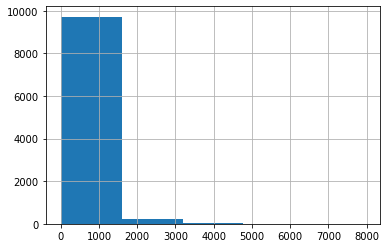

In [ ]:
superstore['Sales'].hist(bins = 5)

In [ ]:
# do it yourself: create 3 equally spaced bins for profit
# do it yourself: create one bin for negative profit and 3 equally sized bins for positive profits (there is a problem in the pandas library)

In [ ]:
# solution 2

# split into negative and positive and do the cut 

## negative 
n_labels = ['negative']

n_profit = superstore[superstore['Profit']< 0]

n_bin =  pd.cut(n_profit['Profit'], 1, labels = n_labels)
print(n_bin.value_counts())

## postive
p_labels = ['low', 'mid', 'hig']

p_profit = superstore[superstore['Profit']> 0]

p_bin =  pd.cut(p_profit['Profit'], 3, labels = p_labels)

print(p_bin.value_counts())




negative    2118
Name: Profit, dtype: int64
low    7706
mid      17
hig       1
Name: Profit, dtype: int64


# Grouping

In [ ]:
# from a data analysis point of view there are two types of columns:

# - Dimensions -> categorical variables -> Segment, City, Country -> they cannot be aggregated using typical maths operators -> sum, doesnt work
# - Measures -> numerical variables -> can be aggregated

# We sometimes are able to turn measures into dimensions by binning e.g. low risk, medium, high, very high

# normally we represent measures as a function of dimensions -> sales per country, profit per state. This is done with group by

In [ ]:
# Group by similar to SQL, but with a lot of flexibility
#### tip for sintax:  groupby(the dimensions you want to group by).agg({measure(s) to aggregate: aggegation function(s)}) ####

superstore.groupby(['Segment']).agg({'Sales':'sum','Order Date':'min'})

#alternatively, if we only have one column we can use the alternative syntax

superstore.groupby(['Segment'])['Sales'].agg(sum)

# grouped by dimensions become the new index!!

#superstore.groupby(['Segment','State']).agg({'Sales':'sum','Order Date':'min','Customer ID':'nunique'}).head()

Segment
Consumer       1.529716e+06
Corporate      9.200083e+05
Home Office    4.883645e+05
Name: Sales, dtype: float64

In [ ]:
#Multi-indexes can be hard to manage
#Tip, you can turn the index back into columns by using reset_index()
superstore.groupby(['Segment','State']).agg({'Sales':'sum','Order Date':'min','Customer ID':'nunique'}).reset_index().head()

,Segment,State,Sales,Order Date,Customer ID
0,Consumer,Abruzzi,3851.8800,04/06/2017,4
1,Consumer,Alsace-Champagne-Ardenne-Lorraine,20664.8715,01/09/2015,44
2,Consumer,Andalusía,18270.4350,01/02/2016,31
3,Consumer,Antwerp,7899.0900,01/01/2016,9
4,Consumer,Apulia,12537.0000,02/02/2016,23


In [ ]:
# what if I want to define my own aggregation operation?
# you define your own aggregation function

def range_aggregation(x):
    return max(x) - min(x)

range_aggregation([2,4,6,8,10]) 


8

In [ ]:
# perform your usual group by, but then in the aggregation method, call the function you just defined
superstore.groupby('Segment')['Sales'].agg(range_aggregation)

Segment
Consumer       5782.065
Corporate      7954.500
Home Office    5269.050
Name: Sales, dtype: float64

In [ ]:
#do it yourself: find the average profitability and total Sales per shipping mode


# solution

superstore.groupby('Ship Mode').agg({'Profit': 'mean', 'Sales': 'count'})

,Profit,Sales
Ship Mode,,
First Class,32.107759,1454
Same Day,46.551137,516
Second Class,36.584810,1976
Standard Class,37.963840,6054


#------------------------------- Data Manipulation --------------------------------

# Row operations - Apply

In [ ]:
# We have seen we can make a function over all rows by combining columns
superstore['profit ratio'] = superstore['Profit']/superstore['Sales']
superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,profit ratio
0,1,ES-2017-1311038,07/02/2017,11/02/2017,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-ST-10000988,Office Supplies,Storage,"Fellowes Folders, Blue",79.20,3,0.0,39.60,0.500000
1,2,ES-2017-1311038,07/02/2017,11/02/2017,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,TEC-AC-10004144,Technology,Accessories,"SanDisk Numeric Keypad, Bluetooth",388.92,7,0.0,0.00,0.000000
2,3,ES-2017-1311038,07/02/2017,11/02/2017,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-LA-10001915,Office Supplies,Labels,"Avery Legal Exhibit Labels, 5000 Label Set",35.19,3,0.0,16.11,0.457801
3,4,ES-2017-1311038,07/02/2017,11/02/2017,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-ST-10004550,Office Supplies,Storage,"Fellowes Folders, Wire Frame",50.94,2,0.0,13.20,0.259128
4,5,ES-2017-1311038,07/02/2017,11/02/2017,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,TEC-AC-10004068,Technology,Accessories,"Memorex Memory Card, USB",307.44,3,0.0,73.71,0.239754


In [ ]:
# what if I want to perform more complicated operations on the rows?
# I want to calculate if a row is not profitable (profit < 0), profitable (0=< profit < 100) or very profitable (profit>100)

# define a function that creates your logic
# the input will be the value of the profit of each row

def profitable(x):
    if x<0:
        return 'Not Profitable'
    elif x<100: 
        return 'Profitable'
    else:
        return 'Very Profitable'

profitable(-10)

'Not Profitable'

In [ ]:
# applying a function that you want that has some logic in it to a row we use the apply method()
superstore['Profit'].apply(profitable)

0            Profitable
1            Profitable
2            Profitable
3            Profitable
4            Profitable
             ...       
9995         Profitable
9996         Profitable
9997         Profitable
9998    Very Profitable
9999         Profitable
Name: Profit, Length: 10000, dtype: object

In [ ]:
superstore['Profit-Flag'] = superstore['Profit'].apply(profitable)
superstore.head()

# the apply method, will apply the function given to each row in the dataframe, with the respective argument

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,profit ratio,Profit-Flag
0,1,ES-2017-1311038,07/02/2017,11/02/2017,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-ST-10000988,Office Supplies,Storage,"Fellowes Folders, Blue",79.20,3,0.0,39.60,0.500000,Profitable
1,2,ES-2017-1311038,07/02/2017,11/02/2017,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,TEC-AC-10004144,Technology,Accessories,"SanDisk Numeric Keypad, Bluetooth",388.92,7,0.0,0.00,0.000000,Profitable
2,3,ES-2017-1311038,07/02/2017,11/02/2017,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-LA-10001915,Office Supplies,Labels,"Avery Legal Exhibit Labels, 5000 Label Set",35.19,3,0.0,16.11,0.457801,Profitable
3,4,ES-2017-1311038,07/02/2017,11/02/2017,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-ST-10004550,Office Supplies,Storage,"Fellowes Folders, Wire Frame",50.94,2,0.0,13.20,0.259128,Profitable
4,5,ES-2017-1311038,07/02/2017,11/02/2017,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,TEC-AC-10004068,Technology,Accessories,"Memorex Memory Card, USB",307.44,3,0.0,73.71,0.239754,Profitable


In [ ]:
# What if I want a function that uses data from multiple columns?
# For example I want to see if the dat between shipping and Ordering is larger than 7 days and flag the order as 'delayed' in that case

# use a function that take a whole row as an argument

#this is a good time to learn about dates and timestamps. You can find some info here:
#https://docs.python.org/3/library/datetime.html
from datetime import datetime
from datetime import timedelta

def delayed(row):
    delay = datetime.strptime(row['Ship Date'],'%d/%m/%Y')-datetime.strptime(row['Order Date'],'%d/%m/%Y')
    #essentially converts the date strings from the original table into internal time representations and computes the difference in times 
    if delay>timedelta(days=7):
        #Timedelta represent a period of x days
        return 'Delayed'
    else:
        return 'On-time'

#atetime.strptime('10/02/2017','%d/%m/%Y')-datetime.strptime('07/02/2017','%d/%m/%Y')

datetime.timedelta(days=3)

In [ ]:
#to run your function over all rows, you ahve to pass along the argument "axis=1"
superstore['Delayed?'] = superstore.apply(delayed, axis=1)
superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Delayed?
0,1,ES-2017-1311038,07/02/2017,11/02/2017,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-ST-10000988,Office Supplies,Storage,"Fellowes Folders, Blue",79.20,3,0.0,39.60,On-time
1,2,ES-2017-1311038,07/02/2017,11/02/2017,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,TEC-AC-10004144,Technology,Accessories,"SanDisk Numeric Keypad, Bluetooth",388.92,7,0.0,0.00,On-time
2,3,ES-2017-1311038,07/02/2017,11/02/2017,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-LA-10001915,Office Supplies,Labels,"Avery Legal Exhibit Labels, 5000 Label Set",35.19,3,0.0,16.11,On-time
3,4,ES-2017-1311038,07/02/2017,11/02/2017,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-ST-10004550,Office Supplies,Storage,"Fellowes Folders, Wire Frame",50.94,2,0.0,13.20,On-time
4,5,ES-2017-1311038,07/02/2017,11/02/2017,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,TEC-AC-10004068,Technology,Accessories,"Memorex Memory Card, USB",307.44,3,0.0,73.71,On-time


In [ ]:
superstore['Segment'].value_counts()

Consumer       5186
Corporate      3077
Home Office    1737
Name: Segment, dtype: int64

In [ ]:
superstore['Ship Mode'].value_counts()

Standard Class    6054
Second Class      1976
First Class       1454
Same Day           516
Name: Ship Mode, dtype: int64

In [ ]:
#do it yourself: create a function that categorizes an order as "Priority 1" if 
# - the Segment is Corporate and ship mode is First or Second Class
# - the ship mode is First Class
#and "Priority 2" otherwise 

In [ ]:
# solution 
def priority(row):
  if (row['Segment'] == 'Corporate') & ((row['Ship Mode'] == 'First Class') | (row['Ship Mode'] == 'Second Class')):
    return 'Priority 1'
  elif (row['Ship Mode'] == 'First Class'):
    return 'Priority 1'
  else:
    return 'Priority 2'

superstore['Priority'] = superstore.apply(priority, axis = 1)

superstore.tail(20)

# Merging

In [ ]:
# Merging is the way to cross information from multiple datasources.
#It is functionally the same as JOIN from SQL, even in the names of the methods
returns = pd.read_excel("Sample - EU Superstore.xlsx",sheet_name = "Returns")

In [ ]:
display(returns.shape)
returns.head()

(284, 2)

,Order ID,Returned
0,ES-2017-5389384,Yes
1,ES-2017-3638264,Yes
2,IT-2016-1498487,Yes
3,IT-2017-3941500,Yes
4,ES-2015-4840257,Yes


In [ ]:
display(superstore.shape)

superstore.head()

(10000, 21)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Priority
0,1,ES-2017-1311038,07/02/2017,11/02/2017,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-ST-10000988,Office Supplies,Storage,"Fellowes Folders, Blue",79.20,3,0.0,39.60,Priority 2
1,2,ES-2017-1311038,07/02/2017,11/02/2017,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,TEC-AC-10004144,Technology,Accessories,"SanDisk Numeric Keypad, Bluetooth",388.92,7,0.0,0.00,Priority 2
2,3,ES-2017-1311038,07/02/2017,11/02/2017,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-LA-10001915,Office Supplies,Labels,"Avery Legal Exhibit Labels, 5000 Label Set",35.19,3,0.0,16.11,Priority 2
3,4,ES-2017-1311038,07/02/2017,11/02/2017,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-ST-10004550,Office Supplies,Storage,"Fellowes Folders, Wire Frame",50.94,2,0.0,13.20,Priority 2
4,5,ES-2017-1311038,07/02/2017,11/02/2017,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,TEC-AC-10004068,Technology,Accessories,"Memorex Memory Card, USB",307.44,3,0.0,73.71,Priority 2


In [ ]:
#if we want details only on the returned orders
just_returned_details = pd.merge(left = superstore,
                                 right = returns,
                                 how = 'inner', 
                                 left_on = "Order ID", 
                                 right_on= "Order ID")
display(just_returned_details.shape)
just_returned_details.head()

(637, 32)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Unitary price,Large sale,Large Sales,Large Quantity,Salesmean,Large Quantity and Sales,Large Quantity or Sales,not Large Quantity,profit ratio,Profit-Flag,Delayed?,Returned
0,27,ES-2017-2557751,28/02/2017,04/03/2017,Standard Class,SP-20920,Susan Pistek,Consumer,Heilbronn,Baden-Württemberg,Germany,Central,TEC-MA-10000946,Technology,Machines,"Panasonic Calculator, Red",332.010,7,0.0,112.770,47.430,True,True,True,293.808906,True,True,False,0.339658,Very Profitable,On-time,Yes
1,28,ES-2017-2557751,28/02/2017,04/03/2017,Standard Class,SP-20920,Susan Pistek,Consumer,Heilbronn,Baden-Württemberg,Germany,Central,OFF-ST-10004409,Office Supplies,Storage,"Rogers Box, Industrial",110.025,5,0.1,-12.225,22.005,True,False,False,293.808906,False,False,True,-0.111111,Not Profitable,On-time,Yes
2,29,ES-2017-2557751,28/02/2017,04/03/2017,Standard Class,SP-20920,Susan Pistek,Consumer,Heilbronn,Baden-Württemberg,Germany,Central,OFF-FA-10000146,Office Supplies,Fasteners,"Stockwell Rubber Bands, Assorted Sizes",41.940,3,0.0,7.920,13.980,False,False,False,293.808906,False,False,True,0.188841,Profitable,On-time,Yes
3,60,ES-2016-4569090,29/08/2016,03/09/2016,Standard Class,GA-14725,Guy Armstrong,Consumer,Rome,Lazio,Italy,South,OFF-AR-10000316,Office Supplies,Art,"Stanley Pens, Blue",30.150,3,0.0,14.760,10.050,False,False,False,293.808906,False,False,True,0.489552,Profitable,On-time,Yes
4,61,ES-2016-4569090,29/08/2016,03/09/2016,Standard Class,GA-14725,Guy Armstrong,Consumer,Rome,Lazio,Italy,South,TEC-MA-10002844,Technology,Machines,"Okidata Receipt Printer, White",145.584,2,0.4,-82.536,72.792,True,False,False,293.808906,False,False,True,-0.566930,Not Profitable,On-time,Yes


In [ ]:
# if we want to keep all orders, and just flag the returned ones, we can do a left merge
just_returned_addition = pd.merge(left = superstore,
                                  right = returns,
                                  how = 'left', 
                                  left_on = "Order ID", 
                                  right_on= "Order ID")
display(just_returned_addition.shape)
just_returned_addition.head()

(10000, 32)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Unitary price,Large sale,Large Sales,Large Quantity,Salesmean,Large Quantity and Sales,Large Quantity or Sales,not Large Quantity,profit ratio,Profit-Flag,Delayed?,Returned
0,1,ES-2017-1311038,07/02/2017,11/02/2017,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-ST-10000988,Office Supplies,Storage,"Fellowes Folders, Blue",79.20,3,0.0,39.60,26.40,False,False,False,293.808906,False,False,True,0.500000,Profitable,On-time,NaN
1,2,ES-2017-1311038,07/02/2017,11/02/2017,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,TEC-AC-10004144,Technology,Accessories,"SanDisk Numeric Keypad, Bluetooth",388.92,7,0.0,0.00,55.56,True,True,True,293.808906,True,True,False,0.000000,Profitable,On-time,NaN
2,3,ES-2017-1311038,07/02/2017,11/02/2017,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-LA-10001915,Office Supplies,Labels,"Avery Legal Exhibit Labels, 5000 Label Set",35.19,3,0.0,16.11,11.73,False,False,False,293.808906,False,False,True,0.457801,Profitable,On-time,NaN
3,4,ES-2017-1311038,07/02/2017,11/02/2017,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-ST-10004550,Office Supplies,Storage,"Fellowes Folders, Wire Frame",50.94,2,0.0,13.20,25.47,False,False,False,293.808906,False,False,True,0.259128,Profitable,On-time,NaN
4,5,ES-2017-1311038,07/02/2017,11/02/2017,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,TEC-AC-10004068,Technology,Accessories,"Memorex Memory Card, USB",307.44,3,0.0,73.71,102.48,True,True,False,293.808906,False,True,True,0.239754,Profitable,On-time,NaN


# Melt and verticalization

In [ ]:
# For some applications (like data visualization) we will want information to be verticalized, so we can filter on columns rather than rows
# the typical example here is the calendar

orders = pd.read_excel("orders.xlsx")
orders.head()

#We may want to filter by month, for example

,Order ID,Ship Date,Ship Mode,City,State,Country,Region,Product ID,Jan,Feb,Mar,Apr,May,June,July,August,September,Oct,Nov,Dec
0,ES-2014-1846006,2016-01-03,First Class,Paris,Ile-de-France,France,Central,FUR-BO-10001405,0.296785,0.740937,0.319342,0.664082,0.491991,0.279603,0.721468,0.827661,0.266435,0.593755,0.624222,0.666361
1,ES-2014-1846006,2016-01-03,First Class,Paris,Ile-de-France,France,Central,OFF-AP-10000977,0.920646,0.968545,0.171464,0.244247,0.025352,0.119380,0.931719,0.742272,0.886169,0.258289,0.523348,0.629398
2,ES-2014-1846006,2016-01-03,First Class,Paris,Ile-de-France,France,Central,OFF-BI-10002083,0.879809,0.363669,0.150853,0.888946,0.860743,0.648089,0.022201,0.637949,0.873964,0.738800,0.869995,0.182114
3,ES-2015-1001989,2015-03-15,First Class,Berlin,Berlin,Germany,Central,OFF-BI-10002570,0.258669,0.915954,0.207590,0.659243,0.656168,0.346124,0.227398,0.934574,0.639858,0.757322,0.921393,0.983744
4,ES-2015-1010958,2015-06-07,Standard Class,Deuil-la-Barre,Ile-de-France,France,Central,OFF-BI-10004924,0.283790,0.224399,0.518316,0.396888,0.709176,0.137325,0.771152,0.605851,0.209154,0.599237,0.209094,0.662120


In [ ]:
#pd.melt( data to melt, columns to keep)
columns = ['Order ID', 'Ship Date', "Ship Mode", 'City', 'State', 'Country','Region','Product ID']
vertical = pd.melt(orders, id_vars= columns)
vertical

,Order ID,Ship Date,Ship Mode,City,State,Country,Region,Product ID,variable,value
0,ES-2014-1846006,2016-01-03,First Class,Paris,Ile-de-France,France,Central,FUR-BO-10001405,Jan,0.296785
1,ES-2014-1846006,2016-01-03,First Class,Paris,Ile-de-France,France,Central,OFF-AP-10000977,Jan,0.920646
2,ES-2014-1846006,2016-01-03,First Class,Paris,Ile-de-France,France,Central,OFF-BI-10002083,Jan,0.879809
3,ES-2015-1001989,2015-03-15,First Class,Berlin,Berlin,Germany,Central,OFF-BI-10002570,Jan,0.258669
4,ES-2015-1010958,2015-06-07,Standard Class,Deuil-la-Barre,Ile-de-France,France,Central,OFF-BI-10004924,Jan,0.283790
...,...,...,...,...,...,...,...,...,...,...
119923,IT-2018-5975833,2018-07-23,Standard Class,Essen,North Rhine-Westphalia,Germany,Central,OFF-AP-10000717,Dec,0.787444
119924,IT-2018-5984498,2018-10-06,Standard Class,Amsterdam,North Holland,Netherlands,Central,FUR-BO-10002680,Dec,0.624923
119925,IT-2018-5989338,2018-04-18,Standard Class,Pamiers,Languedoc-Roussillon-Midi-Pyrénées,France,Central,OFF-ST-10003785,Dec,0.619906
119926,IT-2018-5992832,2018-08-17,Second Class,Bottrop,North Rhine-Westphalia,Germany,Central,OFF-LA-10000707,Dec,0.802197


In [ ]:
display(orders.shape)
display(vertical.shape)

(9994, 20)

(119928, 10)

# Dummy Variables and one-hot encoding 

In [ ]:
# to_dummies -> very important in machine learning to turn categorical variables into numerical ones without giving them numeric meaning

orders.head()

,Order ID,Ship Date,Ship Mode,City,State,Country,Region,Product ID,Jan,Feb,Mar,Apr,May,June,July,August,September,Oct,Nov,Dec
0,ES-2014-1846006,2016-01-03,First Class,Paris,Ile-de-France,France,Central,FUR-BO-10001405,0.296785,0.740937,0.319342,0.664082,0.491991,0.279603,0.721468,0.827661,0.266435,0.593755,0.624222,0.666361
1,ES-2014-1846006,2016-01-03,First Class,Paris,Ile-de-France,France,Central,OFF-AP-10000977,0.920646,0.968545,0.171464,0.244247,0.025352,0.119380,0.931719,0.742272,0.886169,0.258289,0.523348,0.629398
2,ES-2014-1846006,2016-01-03,First Class,Paris,Ile-de-France,France,Central,OFF-BI-10002083,0.879809,0.363669,0.150853,0.888946,0.860743,0.648089,0.022201,0.637949,0.873964,0.738800,0.869995,0.182114
3,ES-2015-1001989,2015-03-15,First Class,Berlin,Berlin,Germany,Central,OFF-BI-10002570,0.258669,0.915954,0.207590,0.659243,0.656168,0.346124,0.227398,0.934574,0.639858,0.757322,0.921393,0.983744
4,ES-2015-1010958,2015-06-07,Standard Class,Deuil-la-Barre,Ile-de-France,France,Central,OFF-BI-10004924,0.283790,0.224399,0.518316,0.396888,0.709176,0.137325,0.771152,0.605851,0.209154,0.599237,0.209094,0.662120


In [ ]:
# one hot encoding of a categorical variable
# get_dummies(dataframe to get dummies, column(s) you want to make dummies)
pd.get_dummies(orders, columns = ['Ship Mode'])

,Order ID,Ship Date,City,State,Country,Region,Product ID,Jan,Feb,Mar,Apr,May,June,July,August,September,Oct,Nov,Dec,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class
0,ES-2014-1846006,2016-01-03,Paris,Ile-de-France,France,Central,FUR-BO-10001405,0.296785,0.740937,0.319342,0.664082,0.491991,0.279603,0.721468,0.827661,0.266435,0.593755,0.624222,0.666361,1,0,0,0
1,ES-2014-1846006,2016-01-03,Paris,Ile-de-France,France,Central,OFF-AP-10000977,0.920646,0.968545,0.171464,0.244247,0.025352,0.119380,0.931719,0.742272,0.886169,0.258289,0.523348,0.629398,1,0,0,0
2,ES-2014-1846006,2016-01-03,Paris,Ile-de-France,France,Central,OFF-BI-10002083,0.879809,0.363669,0.150853,0.888946,0.860743,0.648089,0.022201,0.637949,0.873964,0.738800,0.869995,0.182114,1,0,0,0
3,ES-2015-1001989,2015-03-15,Berlin,Berlin,Germany,Central,OFF-BI-10002570,0.258669,0.915954,0.207590,0.659243,0.656168,0.346124,0.227398,0.934574,0.639858,0.757322,0.921393,0.983744,1,0,0,0
4,ES-2015-1010958,2015-06-07,Deuil-la-Barre,Ile-de-France,France,Central,OFF-BI-10004924,0.283790,0.224399,0.518316,0.396888,0.709176,0.137325,0.771152,0.605851,0.209154,0.599237,0.209094,0.662120,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,IT-2018-5975833,2018-07-23,Essen,North Rhine-Westphalia,Germany,Central,OFF-AP-10000717,0.819154,0.553914,0.629239,0.134236,0.670699,0.842767,0.361586,0.575582,0.488450,0.544693,0.747544,0.787444,0,0,0,1
9990,IT-2018-5984498,2018-10-06,Amsterdam,North Holland,Netherlands,Central,FUR-BO-10002680,0.687606,0.497367,0.924594,0.818652,0.658949,0.777059,0.392183,0.562190,0.820620,0.038028,0.505030,0.624923,0,0,0,1
9991,IT-2018-5989338,2018-04-18,Pamiers,Languedoc-Roussillon-Midi-Pyrénées,France,Central,OFF-ST-10003785,0.844459,0.565612,0.898033,0.512931,0.547257,0.246410,0.689964,0.224034,0.837423,0.664930,0.405134,0.619906,0,0,0,1
9992,IT-2018-5992832,2018-08-17,Bottrop,North Rhine-Westphalia,Germany,Central,OFF-LA-10000707,0.078376,0.605297,0.043026,0.174231,0.694810,0.799297,0.257516,0.418385,0.073775,0.861150,0.239459,0.802197,0,0,1,0


# Data cleaning

In [ ]:
# basic data cleaning operations

# check before labtime -> check the df.dropna -> drops rows/columns that contain null values

# the duplicates method goes to each column and checks if the values inside are the same for each row

# drop duplicates

orders.drop_duplicates().shape

In [ ]:
orders = orders.drop('Product ID', axis = 1)
orders = orders.drop('Product Name', axis = 1)
orders = orders.drop('Sales', axis = 1)
orders = orders.drop('Profit', axis = 1)
orders = orders.drop('Discount', axis = 1)
orders = orders.drop('Quantity', axis = 1)
orders = orders.drop('profit ratio', axis = 1)
orders = orders.drop('Profit-Flag', axis = 1)
orders = orders.drop('Row ID', axis = 1)
orders = orders.drop('new_column', axis = 1)

orders

In [ ]:
orders.drop_duplicates().shape